# 빅데이터 05

##  2개 변수 간의 관계 분석

- 상관이 있는가?
- 독립변수가 종속변수에 영향을 주었는가? 
- 변수 유형
    - nominal  vs. numeric 
    - discrete vs. continuous
- 또다른 분류
    - unordered nominal : 혈액형, 남녀
    - continuous numeric : 키, 몸무게   (같은 사람이 없다) 
    - ordered nomianl : 성적 (  A, B, C, D, E ), 직급 (사원, 대리, 과장, 차장, 부장)
    - discrete numberic :  나이 

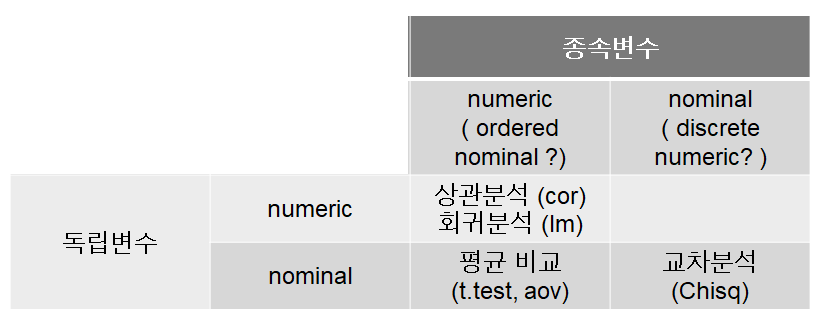



## nominal - nominal : 교차분석

 - 성별에 따라 생존자 숫자 (비율)이 다른가?
 - contigency table (cross table)  : 두 개의 변수의 도수를 표시
 - pd.crosstab ( 변수1, 변수2, normalize=True or False)  : normalize = 비율
 - 교차 분석이라고 부름

In [1]:
import seaborn as sns
import pandas as pd

titanic= sns.load_dataset("titanic")
pd.crosstab(titanic.sex, titanic.survived)

survived,0,1
sex,,
female,81,233
male,468,109


In [2]:
pd.crosstab(titanic.sex, titanic.survived, normalize=True)

survived,0,1
sex,,
female,0.090909,0.261504
male,0.525253,0.122334


## 시각화 
- bar차트 : crosstab객체.plot.bar () 


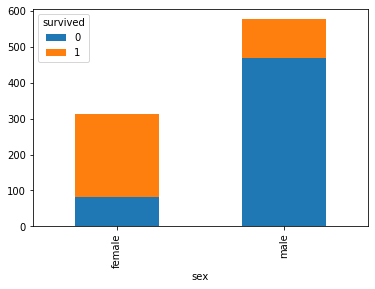

In [3]:
ct=pd.crosstab(titanic.sex, titanic.survived)
ct.plot.bar(stacked=True)   # seaborn lib
  

- pie chart

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000018905F80C08>,
      dtype=object)

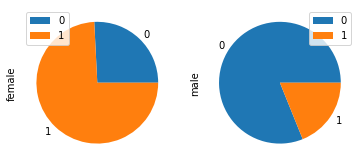

In [4]:
ct=pd.crosstab(titanic.survived, titanic.sex )
ct.plot.pie(subplots=True)

## 차이의 통계적 유의성
- 통계적 유의성 (= 모집단에서도 그럴 것인가 = 지금 샘플의 결과에서의 차이가 통계적으로 유의미한 차이인가)
- chi2_contingency(crosstab) 
- pvalue < 0.05 이면 (남녀 생존율이) 통계적으로 유의미한 차이가 있다. 


In [5]:
from scipy import stats
stats.chi2_contingency(ct) # 2번째 값이 p value

(260.71702016732104,
 1.1973570627755645e-58,
 1,
 array([[193.47474747, 355.52525253],
        [120.52525253, 221.47474747]]))

- 해석 : 남녀 생존율이 통계적으로 유의한 차이가 있다

## 과제1 : class별 생존자수를 비교하고 (시각화포함), 통계적으로 유의한 차이인지 분석하시오


survived    0    1
class             
First      80  136
Second     97   87
Third     372  119


(102.88898875696056,
 4.549251711298793e-23,
 2,
 array([[133.09090909,  82.90909091],
        [113.37373737,  70.62626263],
        [302.53535354, 188.46464646]]))

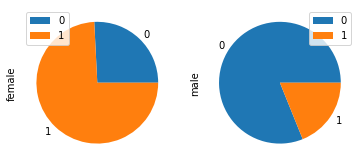

In [13]:
ctct=pd.crosstab(titanic["class"], titanic.survived)
print(ctct)
ct.plot.pie(subplots=True)

stats.chi2_contingency(ctct)

survived    0    1
class             
First      80  136
Second     97   87
Third     372  119


(102.88898875696056,
 4.549251711298793e-23,
 2,
 array([[133.09090909,  82.90909091],
        [113.37373737,  70.62626263],
        [302.53535354, 188.46464646]]))

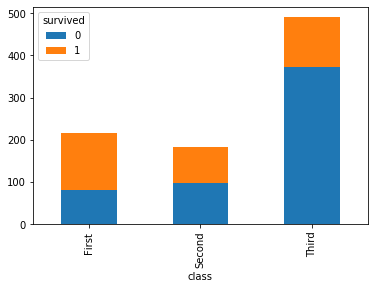

In [14]:
ct2=pd.crosstab(titanic["class"], titanic.survived)
print(ct2)

ct2.plot.bar(stacked=True)

stats.chi2_contingency(ct2)
# pvalue < 0.05 이므로 통계적으로 유의미한 차이가 있다

----

# nominal-numeric : 평균 비교
- nominal data value group  (독립변수) 에 따라 numeric value (종속변수) 의 mean이 다른가?
- 독립변수 -> 종속변수 
- df.groupby (독립변수).종속변수.mean()

In [15]:
# 값이 2 종인 독립변수
titanic.groupby('sex').fare.mean()

sex
female    44.479818
male      25.523893
Name: fare, dtype: float64

In [16]:
# 값이 3종 이상인 독립변수
titanic.groupby('class').fare.mean()

class
First     84.154687
Second    20.662183
Third     13.675550
Name: fare, dtype: float64

In [17]:
# mean 외에도 가능 
titanic.groupby('class').fare.median()

class
First     60.2875
Second    14.2500
Third      8.0500
Name: fare, dtype: float64

## 시각화 
- sns.boxplot (x=독립변수, y=종속변수, data= df ) 


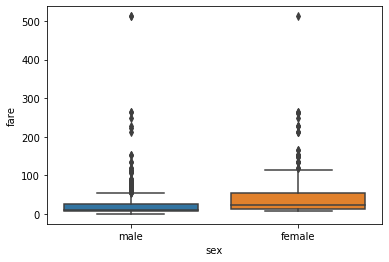

In [18]:
import seaborn as sns

sns.boxplot(x='sex', y='fare', data=titanic)

- 다른 변수 추가 : hue 옵션  sns.boxplot (x=독립변수, y=종속변수, hue=추가 변수, data= df ) 
- 3변수 

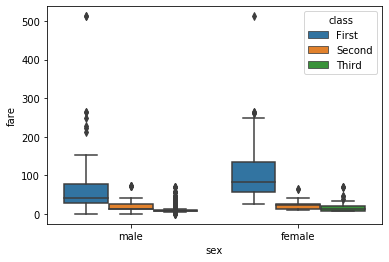

In [19]:
sns.boxplot(x='sex', y='fare', hue='class', data=titanic)

## 2변수 평균 비교 - 통계적 유의성

- Nominal인 독립변수 값의 종류가 2가지 일 때 : t-test
    - numeric 종속변수 
    - 3가지 이상일 때 : anova ( 3변수 이상과 구분 ) 
- T-test도 2종류가 있음
    - 독립적 2 sample 비교 : 서로 다른 group의 값을 비교하는 경우 (예: 남 vs.여)  
    - paired 2 sample 비교 : 같은 대상의 서로 다른 값을 비교하는 경우 (예: 약먹기전의 수치 vs. 약먹은 후의 수치)
    
- 독립적 2 sample 비교 
    - 우선, 분산 비교(F-test: 등분산성, 분산이 차이가 있는지 없는지 )를 해야 함 
    - levene ( sample1, sample2) : p-value < 0.05 이면, 통계적 유의성이 있게 분산의 차이가 있음 
    - ttest_ind ( sample1, sample2, equal_var=True of False)   

In [20]:
from scipy.stats import levene, ttest_ind, ttest_rel

# 값이 2 종인 독립변수
titanic.groupby('sex').fare.mean() 

sex
female    44.479818
male      25.523893
Name: fare, dtype: float64

In [21]:
male= titanic[titanic.sex=="male"]
female= titanic[titanic.sex=="female"]
levene(male.fare,female.fare)

LeveneResult(statistic=19.188225990910503, pvalue=1.3255194429754062e-05)

In [22]:
ttest_ind(male.fare, female.fare, equal_var=False)

Ttest_indResult(statistic=-5.077499013458909, pvalue=5.388057409693912e-07)

- 해석 : 성별에 따른 요금의 차이가 통계적 유의성이 있다. (=통계적으로 유의미한 수준의 차이가 있다)

In [23]:
titanic.sex.value_counts()

male      577
female    314
Name: sex, dtype: int64

###  paired 2 sample

- paired 2 sample :  ttest_rel ( 벡터1, 벡터2)  
- 벡터1, 2의 길이가 같아야.. 
- 같은 레코드 내의 2개 변수 pair
- 2개 변수는 같은 종류 (예, 몸무게) 
- 약을 먹기 전 후에 몸무게 비교
- NA 가 없어야


In [24]:
#임의의 데이터 만들기
import numpy as np
sl=pd.read_csv("studentlist.csv",encoding="cp949")

sl.insert(7, column='height2', value=sl.height+np.random.randint(0,5, len(sl)))
sl

,name,sex,age,grade,absence,bloodtype,height,height2,weight,dept
0,김길동,남자,23,3,유,O,165.3,165.3,68.2,2
1,이미린,여자,22,2,무,AB,170.1,170.1,53.0,3
2,홍길동,남자,24,4,무,B,175.0,178.0,80.1,1
3,김철수,남자,23,3,무,AB,182.1,183.1,85.7,2
4,손세수,여자,20,1,유,A,168.0,170.0,49.5,1
5,박미희,여자,21,2,무,O,162.0,162.0,52.0,3
6,강수친,여자,22,1,무,O,155.2,158.2,45.3,2
7,이희수,여자,23,1,무,A,176.9,178.9,55.0,1
8,이철린,남자,23,3,무,B,178.5,181.5,64.2,1
9,방희철,남자,22,2,무,B,176.1,180.1,61.3,3


In [25]:
sl.describe()

,age,grade,height,height2,weight,dept
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,22.352941,2.294118,170.035294,172.270588,61.064706,2.000000
std,1.169464,1.104802,7.849756,8.068749,11.851685,0.866025
min,20.000000,1.000000,155.200000,158.200000,45.200000,1.000000
25%,22.000000,1.000000,165.300000,166.200000,53.000000,1.000000
50%,22.000000,2.000000,169.200000,170.100000,61.300000,2.000000
75%,23.000000,3.000000,176.100000,179.100000,68.200000,3.000000
max,24.000000,4.000000,182.100000,183.100000,85.700000,3.000000


In [26]:
ttest_rel ( sl.height, sl.height2)

Ttest_relResult(statistic=-6.614950926316518, pvalue=5.944673632879842e-06)

## 3 가지 이상의 값을 갖는 독립변수의 경우


In [27]:
titanic.groupby('pclass').fare.mean()

pclass
1    84.154687
2    20.662183
3    13.675550
Name: fare, dtype: float64

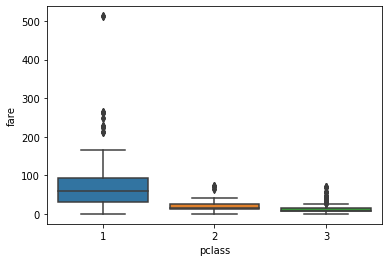

In [28]:
sns.boxplot(x='pclass', y='fare', data=titanic)

### one way anova

- m=ols ('종속변수~독립변수', df).fit ()  : 모델 생성
- anova_lm (m) : 모델에 대한 정보 조회
- 데이터분석에서 모델이란 : 간단히 데이터 또는 데이터 간의 관계를 설명하는 도구

In [29]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

model=ols('fare~pclass', titanic).fit()
print (anova_lm(model))

             df        sum_sq        mean_sq           F        PR(>F)
pclass      1.0  6.636250e+05  663624.976929  384.547434  1.967386e-71
Residual  889.0  1.534174e+06    1725.729827         NaN           NaN


- 해석 : class 별 차이가 통계적 유의성이 있는 수준이다.


## 과제2 : 출발도시에 따라 탑승객 연령의 차이가 있는지 분석하시오. 시각화 포함

                df         sum_sq     mean_sq        F    PR(>F)
embark_town    2.0     267.719790  133.859895  0.63664  0.529369
Residual     709.0  149074.349191  210.260013      NaN       NaN


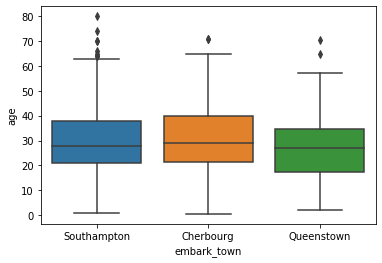

In [35]:
titanic.groupby('embark_town').age.mean()

model=ols('age~embark_town', titanic).fit()
print (anova_lm(model))

sns.boxplot(x='embark_town', y='age', data=titanic)

embark_town
Cherbourg      30.814769
Queenstown     28.089286
Southampton    29.445397
Name: age, dtype: float64
                df         sum_sq     mean_sq        F    PR(>F)
embark_town    2.0     267.719790  133.859895  0.63664  0.529369
Residual     709.0  149074.349191  210.260013      NaN       NaN


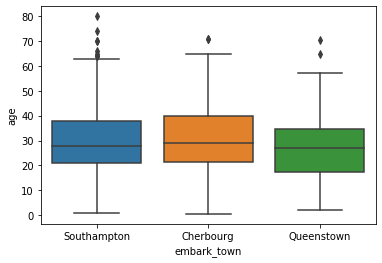

In [36]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import seaborn as sns

print(titanic.groupby('embark_town').age.mean())

model=ols('age~embark_town', titanic).fit()
print(anova_lm(model))

sns.boxplot(x='embark_town', y='age', data=titanic)
#pvalue PR(>F) > 0.05 이므로 통계적으로 유의미한 차이가 없다

---

## numeric-numeric (상관분석)
- 상관관계 : 같이 증가, 같이 감소 (선형적 상관관계)
- 독립변수 -> 종속 변수 같은 순서가 없음
- 데이터를 봐서는 상관관계를 알기 어려움, 시각화 필요

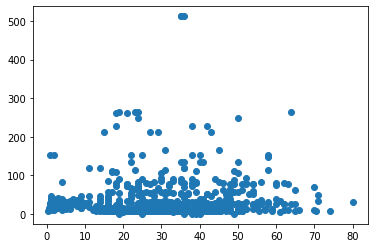

In [37]:
import matplotlib.pyplot as plt

#나이와 요금
plt.scatter("age", "fare", data=titanic)

- 시각화로도 충분치 않아서, 수치화된 계수가 필요
- 상관계수  -1 ~ 1

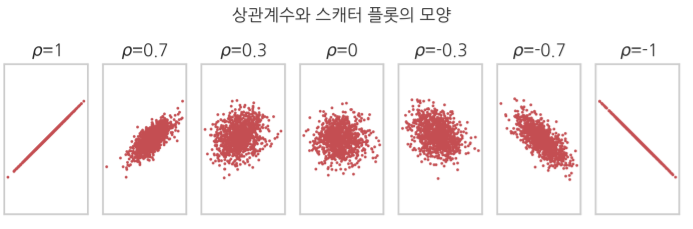

- 상관계수구하기: df.corr() <= 방향성이 없음

In [38]:
# 변수 간 상관계수 구하기 
titanic[['age','fare']].corr()

,age,fare
age,1.000000,0.096067
fare,0.096067,1.000000


In [39]:
# 모든 numeric변수에 대해 (int 인 nominal포함)
titanic.corr() 

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


- 상관분석 : 상관도가 높은 변수 pair를 찾아내기 
- 위의 table 도 눈에 안들어오니 시각화 필요
- sns.pairplot(df, hue=키변수) , 키 변수 : 제3의 변수 추가 분석

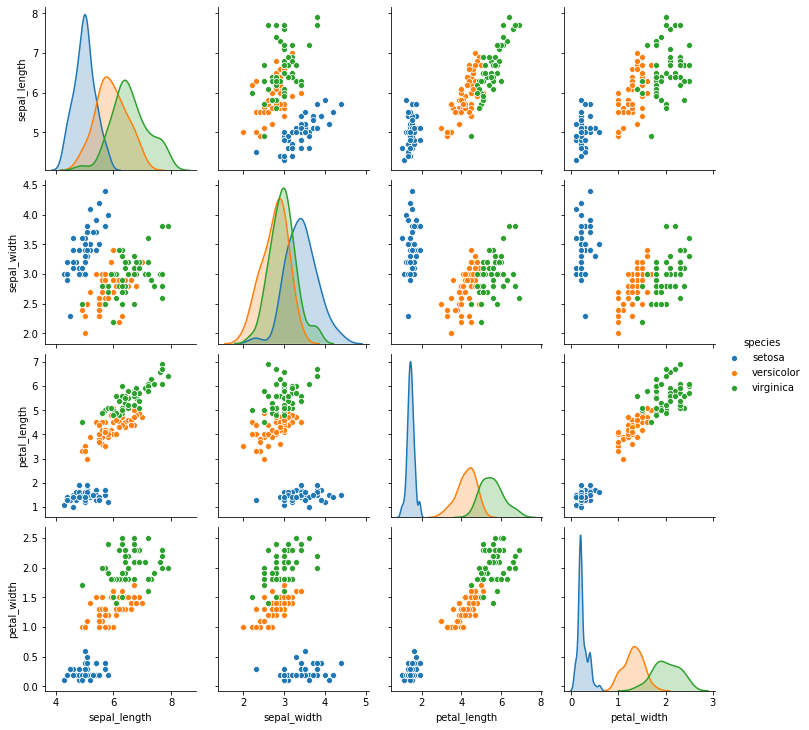

In [40]:
iris=sns.load_dataset('iris')
sns.pairplot(iris, hue = 'species')

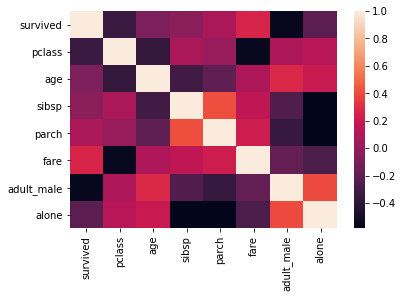

In [41]:
sns.heatmap( titanic.corr()  )

### discrete vs. continous

- discrete vs. continous 과 nominal vs. numeric 에 대해 다시 생각
- 상관계수의 강도 보기 : heatmap(), 밝을 수록 높은 상관관계

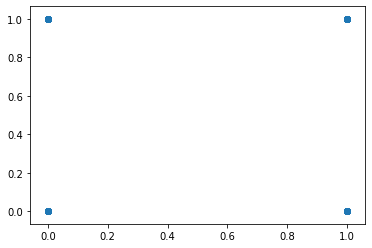

In [42]:
plt.scatter("survived","adult_male" , data=titanic)

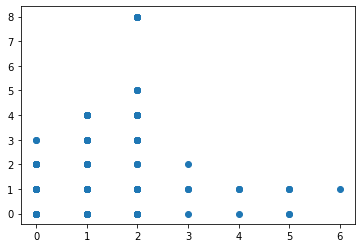

In [43]:
plt.scatter("parch","sibsp" , data=titanic)

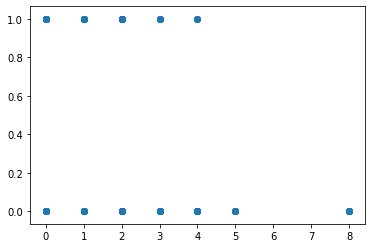

In [44]:
plt.scatter("sibsp","survived",  data=titanic)

## 스피어만 상관계수

- 기본은 pearson : 선형관계 (값의 크기 자체가 의미가 있는 numeric : 곱하기 나누기가 의미를 갖는 숫자)
- 수치형 변수 종류 (3가지)
    - 순서만 의미있는 수치 : 학력 (고졸, 대졸, 대학원졸.. )
    - +/- 가 가능한 수치 : 섭씨온도, 지능지수 
    -  */ /  가 의미있는 수치   : 중량
- spearman: 값의 크기 대신 순위로 계산 (순서가 있는 nominal 데이터)

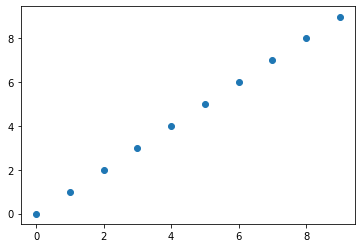

In [45]:
import numpy as np

x=np.arange(0,10)
y1=x

plt.scatter(x,y1)

In [46]:
stats.pearsonr(x,y1)

(1.0, 0.0)

[  0   1   8  27  64 125 216 343 512 729]


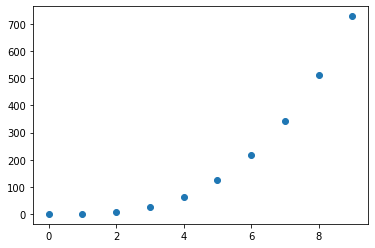

In [47]:
y3=x*x*x
plt.scatter(x,y3)
print (y3)

In [48]:
stats.pearsonr(x,y3)

(0.9084337349397591, 0.00027503173641504566)

In [49]:
stats.spearmanr(x,y3)

SpearmanrResult(correlation=0.9999999999999999, pvalue=6.646897422032013e-64)

## 상관 분석 시 주의점

- 상관계수의 해석이 주관적임(다음 같은 기준이 있긴 하나..)
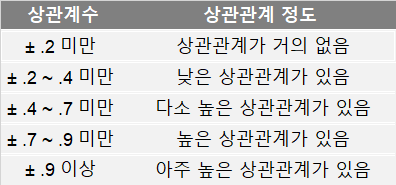

- 특히,개별 관측치에 속한 2변수 (예, 키-몸무게) 가 아닌, 상이한 2개의 통계 데이터( 연도 별 키의 통계, 연도 별 몸무게의 통계) 의 상관관계는 큰 의미가 없다 

- 30개 이상의 관측치(레코드)가 있어야 의미가 있다. t-test에서도 마찬가지.. 

---

## numeric-numeric (회귀분석)
- 상관관계 : 2 변수가 같이 증가, 같이 감소 (선형적 상관관계, 직선에 얼마나 몰려있는지)
- 회귀분석 : 독립변수 -> 종속변수 선형적 상관관계의 정도(기울기)까지 분석

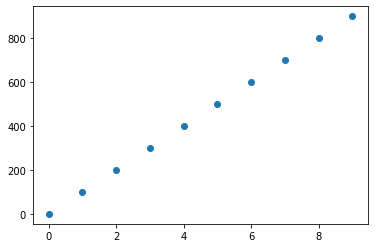

In [50]:
y2=100*x
plt.scatter(x,y2)

In [51]:
stats.pearsonr(x,y2)

(1.0, 0.0)

## (잠깐 데이터 가공) wine 데이터 읽어오기 
- , 대신 다른 seperator를 쓰는 데이터 : read_csv ( sep="구분자")


In [52]:
# red wine 읽어오기
red_df= pd.read_csv("winequality-red.csv", sep=";")
red_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## 과제3 : red wine 데이터("winequaility-red.csv")에서 quality 변수와 가장 상관관계가 높은 변수를 찾으시오. 시각화, 과정 포함

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64


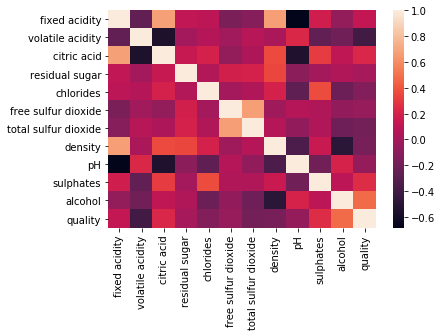

In [53]:
print(red_df.corr().quality)

sns.heatmap(red_df.corr())
# quality 변수와 alcohol 변수가 가장 상관관계가 높다

- dataframe에 column 과 값 추가 : df.insert( 위치, column=이름, value=값 )

In [54]:
red_df.insert(0, column='type', value='red')
red_df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [55]:
# white wine 읽어 오기, column 추가 및 합치기 
white_df= pd.read_csv("winequality-white.csv", sep=";")
white_df.insert(0, column='type', value='white')
wine=pd.concat([red_df, white_df])

- wine data 탐색 

In [56]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


In [57]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


## 회귀 분석 (regression)
- 단순 선형회귀 : 하나의 독립변수 -> 하나의 종속변수
- 모델 생성 : 모델=ols( '종속변수~독립변수', data=데이터).fit() 
- 모델 정보 조회 : 모델.summary(), 모델.params

In [58]:
from scipy import stats
from statsmodels.formula.api import ols, glm 

m1 = ols ( 'quality~alcohol', data=wine).fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.197
Model:                            OLS   Adj. R-squared:                  0.197
Method:                 Least Squares   F-statistic:                     1598.
Date:                Wed, 24 Apr 2024   Prob (F-statistic):          1.50e-312
Time:                        17:04:26   Log-Likelihood:                -7623.4
No. Observations:                6497   AIC:                         1.525e+04
Df Residuals:                    6495   BIC:                         1.526e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4053      0.086     27.988      0.000       2.237       2.574
alcohol        0.3253      0.008     39.970      0.000       0.309       0.341
==============================================================================
Omnibus:                      123.922   Durbin-Watson:                   1.636
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              258.800
Skew:                           0.031   Prob(JB):                     6.34e-57
Kurtosis:                       3.976   Cond. No.                         94.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
print (m1.params)

Intercept    2.405269
alcohol      0.325312
dtype: float64


### 해석 

- coef : 선형 모델 (1차함수 직선)의 기울기  (선형적으로 어느 정도 영향을 주었는지 분석) 
- intercept: 절편
- y(종속변수)= coef*x(독립변수) + intercept



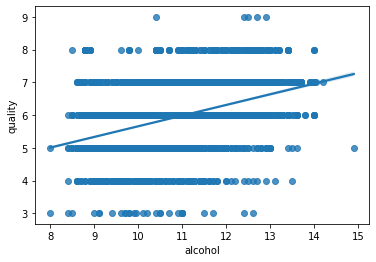

In [60]:
# 모델의 시각화

sns.regplot(x="alcohol", y="quality", data=wine)


### 모델과 예측
- 모델이란 ? 데이터를 설명하는 단순한 툴 (여기서는 1차함수의 절편, 기울기 => linear model) 
- 모델을 이용해서 예측을 할 수 있다. 

In [61]:
red_df= pd.read_csv("winequality-red.csv", sep=";")
red_df.head()
m1 = ols ( 'quality~alcohol', data=wine[:3000]).fit()
m1.predict( wine[3000:].alcohol)

1401    5.393155
1402    6.016788
1403    5.947495
1404    6.190020
1405    5.704971
          ...   
4893    6.051434
4894    5.497093
4895    5.427801
4896    6.605775
4897    6.259312
Length: 3497, dtype: float64

### 중선형 회귀

- 중선형회귀 : 독립변수가 여러개 일때  
- 모델 생성 : 모델=ols( '종속변수~독립변수1+독립변수2+ ... ', data=데이터).fit()
- 심장병 발병 확률
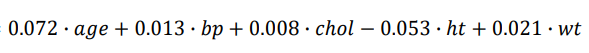

In [62]:
#공백있는 column 이름 처리 
wine.columns = [c.replace(' ', '_') for c in wine.columns]


m2 = ols ( 'quality~fixed_acidity+volatile_acidity+citric_acid+residual_sugar', data=wine).fit()
m2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                     140.2
Date:                Wed, 24 Apr 2024   Prob (F-statistic):          4.16e-115
Time:                        17:04:29   Log-Likelihood:                -8068.7
No. Observations:                6497   AIC:                         1.615e+04
Df Residuals:                    6492   BIC:                         1.618e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            6.5408      0.063    103.286      0.000       6.417       6.665
fixed_acidity       -0.0187      0.009     -2.021      0.043      -0.037      -0.001
volatile_acidity    -1.4688      0.074    -19.728      0.000      -1.615      -1.323
citric_acid          0.0205      0.087      0.234      0.815      -0.151       0.191
residual_sugar      -0.0174      0.002     -7.734      0.000      -0.022      -0.013
==============================================================================
Omnibus:                       81.508   Durbin-Watson:                   1.658
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               94.950
Skew:                           0.218   Prob(JB):                     2.41e-21
Kurtosis:                       3.401   Cond. No.                         92.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- 각 독립변수의 영향이 출력됨 
- p < 0.05 작은 경우만 유의성을 가짐 
- 시각화 : plot_partregress_grid (모델)

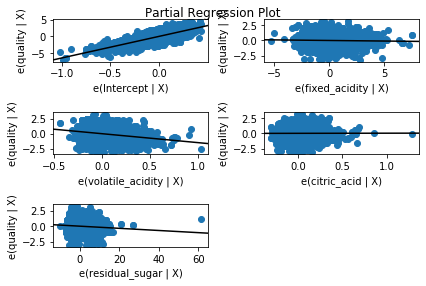

In [63]:
#시각화 
from statsmodels.graphics.regressionplots import plot_partregress_grid
fig=plot_partregress_grid(m2)
fig.tight_layout(pad=1)


## 과제 4 :  0-4999 번 데이터로 중선형회귀 모델을 만들고 5000~  데이터를 예측하시오

In [76]:
wine.columns = [c.replace(' ', '_') for c in wine.columns]


m3 = ols ( 'quality~fixed_acidity+volatile_acidity+citric_acid+residual_sugar', data=wine[:5000]).fit()
m3.predict( wine[5000:][["fixed_acidity", "volatile_acidity", "citric_acid", "residual_sugar"]]) 



3401    6.020883
3402    5.665520
3403    5.901727
3404    6.137518
3405    6.185155
          ...   
4893    6.084270
4894    5.794605
4895    6.041086
4896    5.984531
4897    6.106236
Length: 1497, dtype: float64

In [108]:
wine.columns = [c.replace(' ', '_') for c in wine.columns]

#모델
m3 = ols ('quality~fixed_acidity+volatile_acidity+citric_acid+residual_sugar', data=wine[:5000]).fit()
#데이터 예측
m3.predict(wine[5000:][["fixed_acidity", "volatile_acidity", "citric_acid", "residual_sugar"]])

3401    6.020883
3402    5.665520
3403    5.901727
3404    6.137518
3405    6.185155
          ...   
4893    6.084270
4894    5.794605
4895    6.041086
4896    5.984531
4897    6.106236
Length: 1497, dtype: float64